<b style="font-size:2em;">Final Project Submission</b>

* Student name: Edward Amor 
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL: 

# Business Understanding

## Background

A real estate company in the King County area wants to investigate house sales in order to predict pricing. Our task is to clean, explore, and model the housing data they have supplied to us in `kc_house_data.csv`, and identify house features which significantly effect house price. 

## Scope

To identify which house features significantly effect house price, we will use standard EDA practices, hypothesis testing, and regression modeling to come to our conclusions.

For our client's consumption the results of our analysis will be condensed into a presentation. 

## Goal

Our goal is to generate a multivariate linear regression model which as accurately as possible predicts the sale price of houses.  

## Objectives

1. Data Acquisition
2. Data Understanding
  - Data Cleaning
  - Data Exploration
  - Data Visualization
3. Modeling
  - Feature Engineering
    - Feature Transformation
    - Feature Selection
  - Training
  - Model Evaluation

# Data Acquisition

The data for this project can be found in the file `kc_house_data.csv`.

Within this repository is also `data_dictionary.csv` which describes the data features.

# Data Understanding

According to our data dictionary the features of our dataset are as follows:

| column        | description                                                  |
| ------------- | ------------------------------------------------------------ |
| id            | unique identified for a house                                |
| date          | Date house was sold                                          |
| price         | Price is prediction target                                   |
| bedrooms      | Number of Bedrooms/House                                     |
| bathrooms     | Number of bathrooms/bedrooms                                 |
| sqft_living   | square footage of the home                                   |
| sqft_lot      | square footage of the lot                                    |
| floors        | Total floors (levels) in house                               |
| waterfront    | House which has a view to a waterfront                       |
| view          | Has been viewed                                              |
| condition     | How good the condition is ( Overall )                        |
| grade         | overall grade given to the housing unit                      |
| sqft_above    | square footage of house apart from basement                  |
| sqft_basement | square footage of the basement                               |
| yr_built      | Built Year                                                   |
| yr_renovated  | Year when house was renovated                                |
| zipcode       | zip                                                          |
| lat           | Latitude coordinate                                          |
| long          | Longitude coordinate                                         |
| sqft_living15 | The square footage of interior housing living space for the nearest 15 neighbors |
| sqft_lot15    | The square footage of the land lots of the nearest 15 neighbors |

Of the 20 columns most notable is the price feature which will be our target during linear regression.

Another thing to note is we have location data. This could be used to provide some insight into pricing by location, but may also be of use when delivering key information to our client.

## Data Cleaning

For this section we will inspect our dataset cleaning up inconsistencies such as, null values, duplicates, and incorrect data types.

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
# read in dataframe and output dataframe info
df = pd.read_csv("kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Our raw dataset contains **21597 records**, and has **21 features**.

The data types found within our dataset are: `float64`, `int64`, `object`.

Next we will inspect our features more closely, especially the ones which are of `object` data type. Just to make sure they're the correct data type.

In [3]:
# Output the first 5 rows
display(df.head(5))

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

The `date` column should be transformed to the `datetime` data type instead of `object`.

The `sqft_basement` column needs to be further inspected, the values appear to be `float` there may be some `string` values.

In [4]:
# convert date column from string data type to a datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
# inspect the values of the sqft_basement column
display(df['sqft_basement'].value_counts())

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2610.0        1
875.0         1
1548.0        1
2310.0        1
266.0         1
Name: sqft_basement, Length: 304, dtype: int64

There is a '?' value, this may mean that the value is unknown. We will replace this with a null value, and then convert the column into a float.

In [6]:
# replace ? with np.nan in the sqft_basement column and convert the column to float
df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan).astype('float64')

In [7]:
# redisplay the values in the sqft_basement column
display(df['sqft_basement'].value_counts())

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

All our columns are now numeric, it's time to inspect for any interesting anomalies.

### Inspecting Distributions

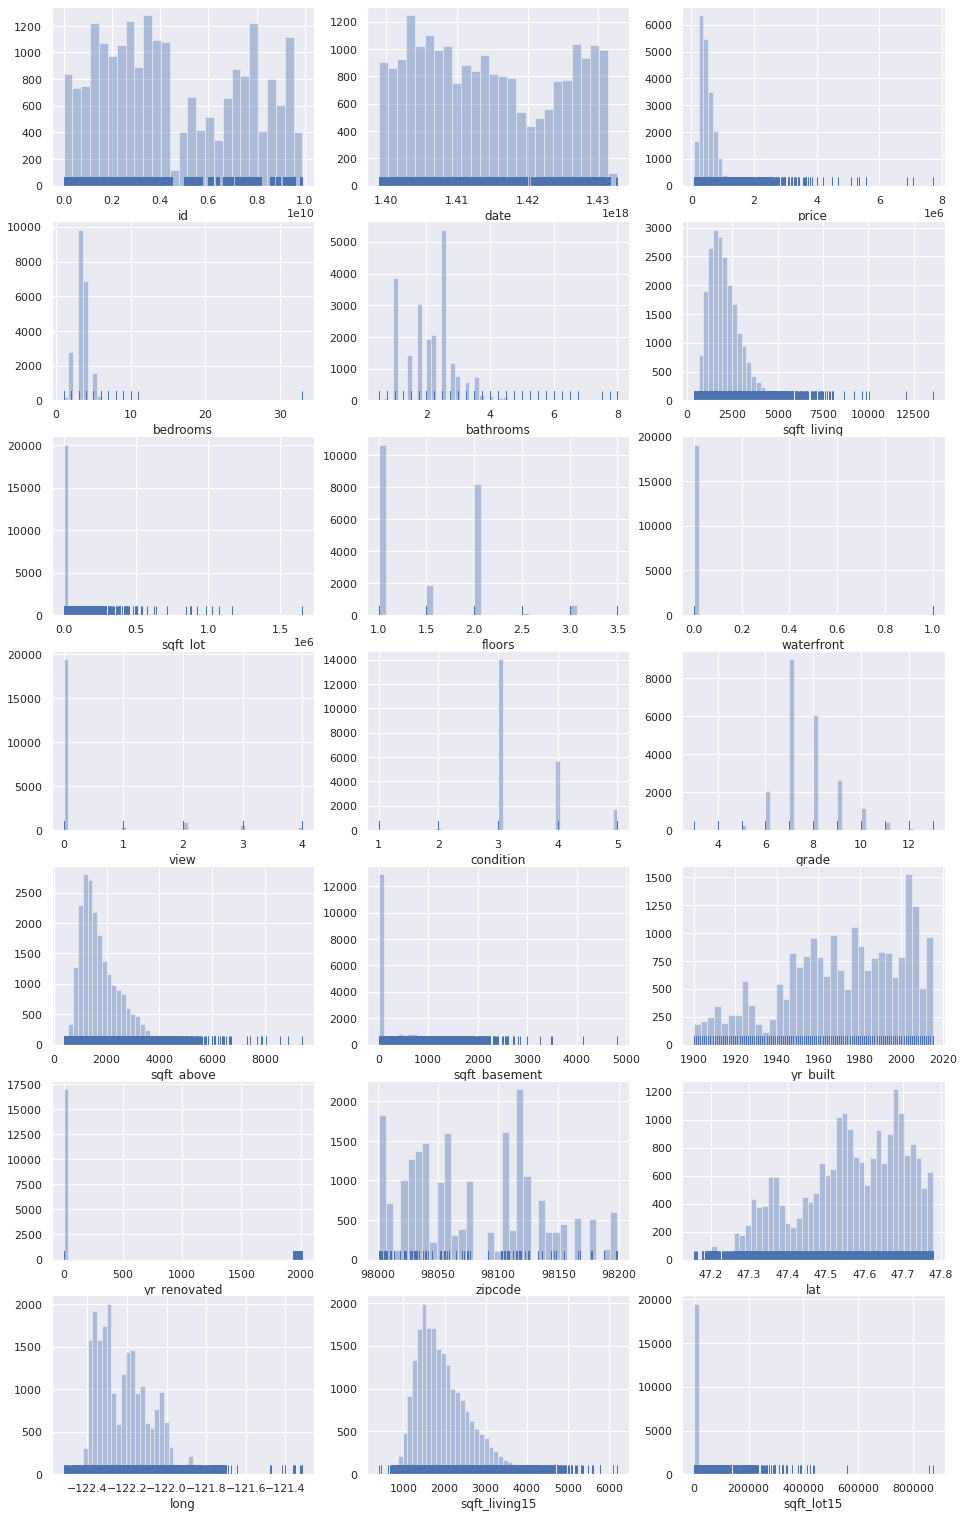

In [8]:
# plot a distribution plot for each feature
fig, ax = plt.subplots(7, 3, figsize=(16, 9*3)) # 21 sub plots

for col, axes in zip(df.columns, ax.flatten()):
    sns.distplot(df[col], kde=False, rug=True, ax=axes)

plt.show()

Columns to disregard when cleaning:

- `id`
- `date`
- `long`
- `lat`
- `zipcode`

From the histograms it looks like we may want to drop the `yr_renovated` column, we will have to investigate further.

There are quite a few columns which should be transformed into the `categorical` data type.

### Impute Inconsistencies

#### yr_renovated

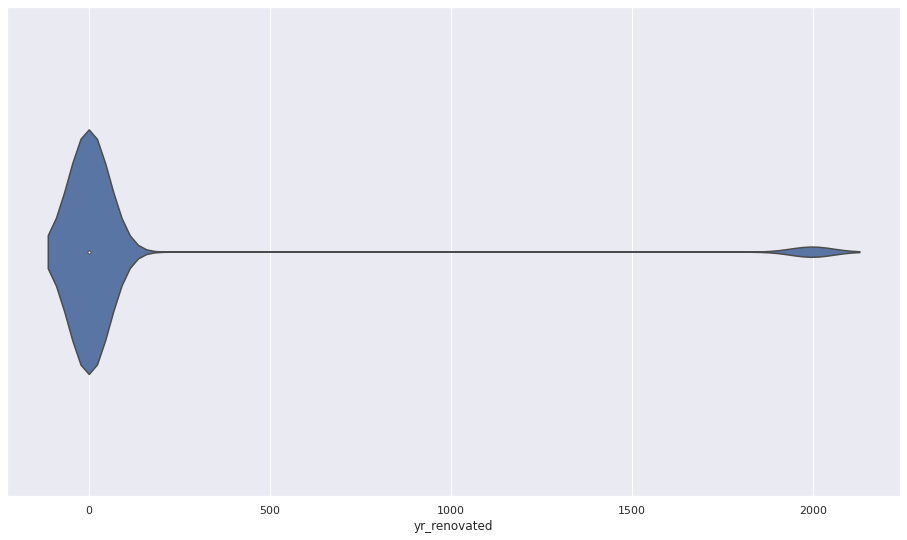

In [9]:
# inspect the yr_renovated column by plotting a violinplot
fig, ax = plt.subplots(figsize=(16, 9))

sns.violinplot('yr_renovated', data=df, width=.5)
plt.show()

In [10]:
# check the value counts for the y_renovated column
display(df['yr_renovated'].value_counts().head())

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

An extremely large percentage of the `yr_renovated` column has the value 0, meaning no renovation has occurred. Instead of removing the column, we can convert the values other than 0 to a 1. Giving us a usable feature instead of dropping one.

In [11]:
# transform the values other than 0 to a 1 in yr_renovated, and rename the column
mask = df['yr_renovated'] != 0
df.loc[mask, 'yr_renovated'] = 1
df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

#### sqft_basement

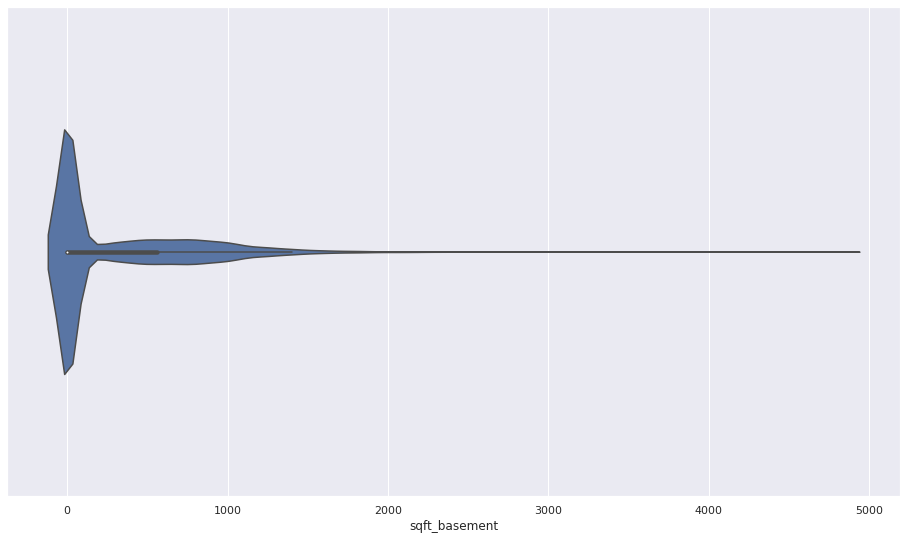

In [12]:
# inspect the sqft_basement column by plotting a violinplot
fig, ax = plt.subplots(figsize=(16, 9))

sns.violinplot('sqft_basement', data=df, width=.5)
plt.show()

In [13]:
# check the value counts for the sqft_basement column
display(df['sqft_basement'].value_counts().head())

0.0      12826
600.0      217
500.0      209
700.0      208
800.0      201
Name: sqft_basement, dtype: int64

An extremely large percentage of the `yr_renovated` column has the value 0, meaning no renovation has occurred. Instead of removing the column, we can convert the values other than 0 to a 1. Giving us a usable feature instead of dropping one.

In [14]:
# transform the values other than 0 to a 1 in yr_renovated, and rename the column
mask = df['sqft_basement'] != 0
df.loc[mask, 'sqft_basement'] = 1
df.rename(columns={'sqft_basement': 'basement'}, inplace=True)

#### bedrooms

Another column we see an error in is the `bedrooms` columns. There is a huge skew, maybe due to a typing error.

In [15]:
# output value counts
display(df['bedrooms'].value_counts())

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

The house with 33 bedrooms may be an typing error, most likely a room with 3 bedrooms, not 33 which would be highly unusual.

In [16]:
# change the 33 bedroom house to a 3 bedroom
df.loc[df['bedrooms'] == 33, 'bedrooms'] = 3

### NA Values

In [17]:
# Output how many NA values we have
display(df.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
basement            0
yr_built            0
renovated           0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

For the `waterfront` and `view` columns, we will replace the na values with 0, to signify no waterfront and no views respectively.

For the `sqft_basement` column we will replace the na values with 0, to signify there is no basement.

In [18]:
# replace the na values with 0 in waterfront, view, sqft_basement
df.replace(np.nan, 0, inplace=True)
display(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
basement         0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Outliers

Since we've taken care of our null values, now we can focus on taking care of outliers which will significantly affect our linear regression in the future.

We will first start with our `price` feature.

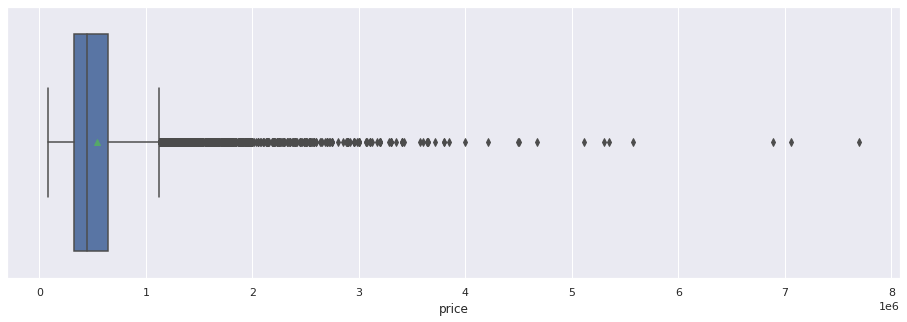

In [19]:
# show boxplot of price column
fig, ax = plt.subplots(figsize=(16, 5))

sns.boxplot('price', data=df, ax=ax, showmeans=True)

plt.show()

There appears to be a significant amount of outliers. Let's identify how many, and whether we should eliminate them.

In [20]:
# using iqr find outliers
q1, q3 = np.quantile(df['price'], (.25, .75))
iqr = q3 - q1
low_bd, up_bd = q1 - iqr*1.5, q3 + iqr*1.5 # upper and lower bound of range
mask = (df['price'] < low_bd) | (df['price'] > up_bd) # outliers mask

outliers_mask = df.index[mask].to_numpy()

In [21]:
# count our outliers
display(f"Outliers Count: {mask.sum()}")
display(f"Outliers Percentage: {mask.sum()/df.shape[0]:.0%}")

'Outliers Count: 1158'

'Outliers Percentage: 5%'

Since we would only be removing approximately 5% of our dataset, 1158 data points, we will drop those rows.

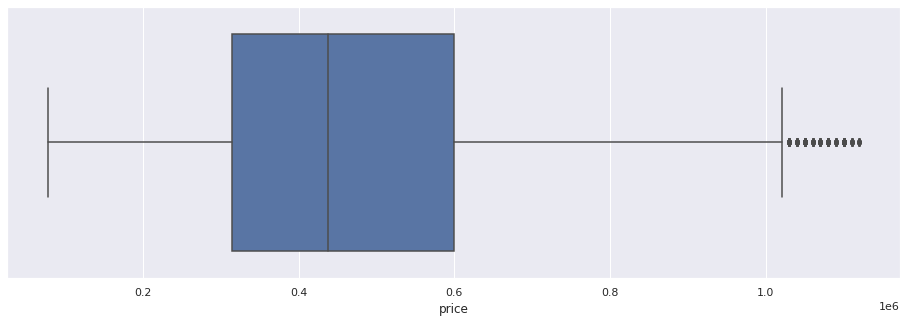

In [22]:
# drop the data points which are price outliers and display a new boxplot of price
df.drop(index=outliers_mask, inplace=True, errors='ignore') # ignore to allow re run

fig, ax = plt.subplots(figsize=(16, 5))

sns.boxplot(df['price'])
plt.show()

We've successfully removed the large amount of `price` outliers that were previously in our dataset.

### Type Conversion

We will convert columns which should be categorical to their correct type.

- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- renovated
- zipcode

In [23]:
# access and convert the categorical columns
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
           'condition', 'grade', 'renovated', 'zipcode', 'yr_built']

df.loc[:, cat_cols] = df.loc[:, cat_cols].astype('category')

In [24]:
# verify conversion
display(df.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms               category
bathrooms              category
sqft_living               int64
sqft_lot                  int64
floors                 category
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
basement                float64
yr_built               category
renovated              category
zipcode                category
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Data Exploration

We'll use some guided questions to help us explore our data easier.

1. Using location data, where are the highest valued properties?
2. Are waterfront properties significantly expensive than non waterfront properties?
3. Is there a relationship between condition and pricing?

### Location

In [25]:
# import our libraries
import plotly.express as px
from plotly.offline import init_notebook_mode

# connect to online cdn
init_notebook_mode(connected=True)

In [26]:
# plot pricing of houses across King County
fig = px.scatter_mapbox(df.sort_values('price'), lat='lat', lon='long', color='price',
                       color_continuous_scale=px.colors.sequential.BuGn,
                       mapbox_style='carto-positron',
                       center=dict(lat=df.lat.median(), lon=df.long.median()),
                       title="House Prices in King County")
fig.show()

There appears to be higher concentrations of high valued houses towards the north of King County, With the majority of those located on the waterfront, there may be other contributing factors since there are high valued houses scattered around King County.

Let's inspect by zip code the median house price, to get a better picture at which areas have higher valued houses.

In [27]:
# import json
import json

In [28]:
# load in geojson of king county zip codes
with open('kc_zips.geojson') as f:
    geojson = json.load(f)

The King County zip codes geojson data was compiled from a larger dataset containing all US zip codes. The larger dataset can be found at: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2019.html

The downloaded data was then converted to a 1.4 GB geojson file by using https://mapshaper.org/. After which it was filtered for only zip codes in King County. 

In [29]:
# create grouped dataframe with median house price for each zip code
zipcode_df = df.groupby('zipcode').median().reset_index()
zipcode_df['zipcode'] = zipcode_df['zipcode'].astype(str)

In [30]:
# plot median house price data on map by zipcode
fig = px.choropleth_mapbox(zipcode_df, geojson=geojson, 
                          featureidkey='properties.ZCTA5CE10', locations='zipcode', 
                          color='price', mapbox_style='carto-positron', opacity=.4,
                          center=dict(
                              lat=zipcode_df.lat.median(),
                              lon=zipcode_df.long.median()
                          ), color_continuous_scale=px.colors.sequential.BuGn,  
                          title="King County Median House Price by Zip Code", )
fig.show()

The map shows us that the 3 zip codes with the highest median house prices are located in the centrally. **Those 3 zip codes are 98039, 98040, and 98004**.

In the future it would be nice to reverse geocode the data we have, and see pricing by neighborhood.

### Waterfront Properties

In [31]:
# immport our libraries
from scipy import stats

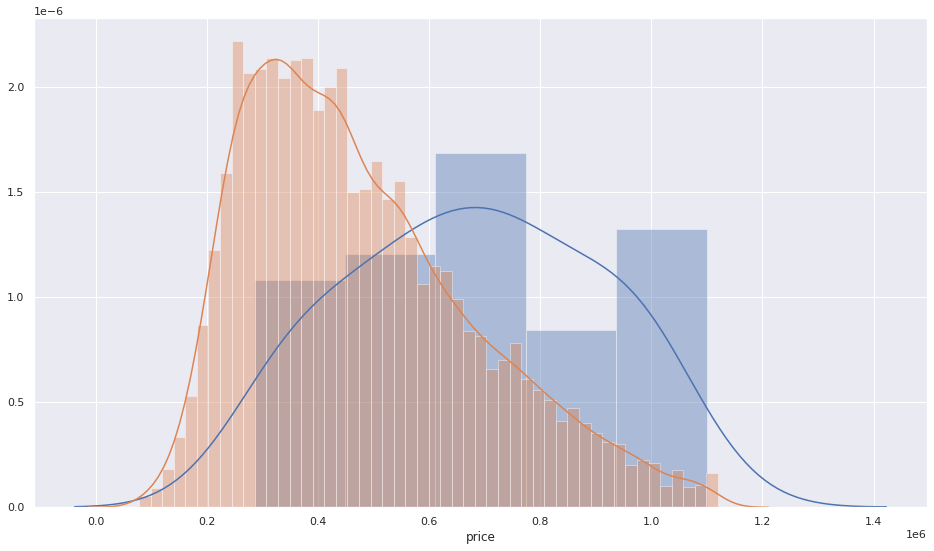

In [32]:
# plot two distplots of the different waterfront price values
mask = df['waterfront'] == 1

fig, ax = plt.subplots(figsize=(16, 9))

sns.distplot(df.loc[mask, 'price'], norm_hist=True, ax=ax, label='waterfront')
sns.distplot(df.loc[~mask, 'price'], norm_hist=True, ax=ax, label='non-waterfront')

plt.show()

These two groups don't look too different, but we can use some hypothesis testing to verify our assumptions.

$\mu_0:$ Waterfront House Mean Value

$\mu_1:$ Non-Waterfront House Mean Value

$H_0: \mu_0 = \mu_1$

$H_a: \mu_0 \ge \mu_1$

$\alpha = $ 5%

In [33]:
# seperate our two populations and also show some 5-point summary of them
mask = df['waterfront'] == 1
waterfront = df.loc[mask, 'price']
nonwaterfront = df.loc[~mask, 'price']

display(df.groupby('waterfront').describe()['price'])

count           mean            std       min       25%  \
waterfront                                                              
0.0         20388.0  476193.925250  207506.801942   78000.0  315000.0   
1.0            51.0  680065.686275  223053.291500  285000.0  511500.0   

                 50%       75%        max  
waterfront                                 
0.0         437000.0  600000.0  1120000.0  
1.0         685000.0  837750.0  1100000.0

Our means are different by about $200,000, but our standard deviations are approximately the same.

In [34]:
# Run a welch's 2 sample t-test
results = stats.ttest_ind(waterfront, nonwaterfront, equal_var=False)
print(f"T-Stat: {results.statistic:.3f}", f"P-Value: {results.pvalue:.8%}", sep='\n')

T-Stat: 6.520
P-Value: 0.00000332%


It appears that we do have a statistically significantly difference between the two populations. For our stakeholders we will provide a simple visualization to drive the point home that waterfront properties are valued higher. 

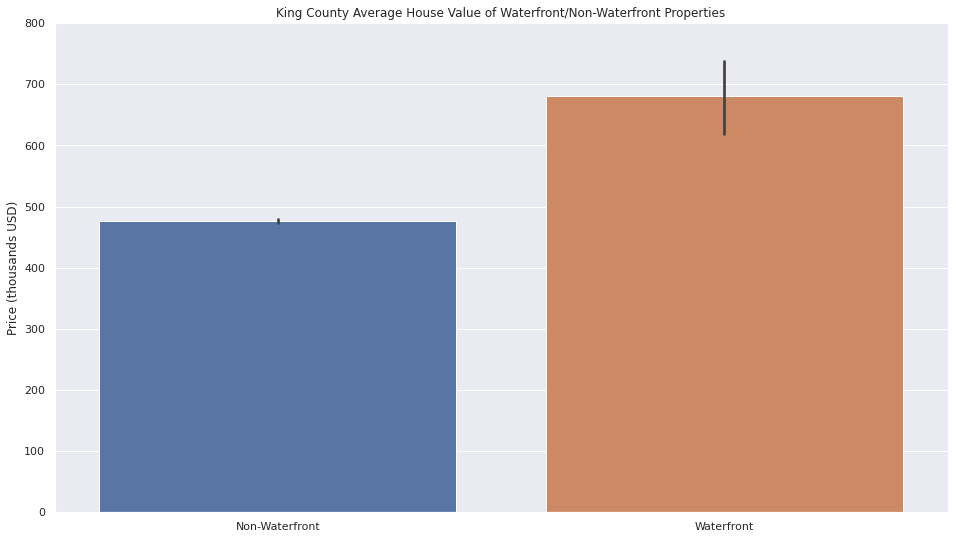

In [35]:
# plot barplot of the two populations average value wiht a confidence level of 95%
fig, ax = plt.subplots(figsize=(16, 9))

sns.barplot(x='waterfront', y='price', data=df, ax=ax)

plt.title('King County Average House Value of Waterfront/Non-Waterfront Properties')

plt.xticks([0, 1], ['Non-Waterfront', 'Waterfront'])
locs, labels = plt.yticks()
plt.yticks(locs, [f"{loc/1000:n}" for loc in locs])

plt.ylabel("Price (thousands USD)")
plt.xlabel("")
plt.show()

### House Grade

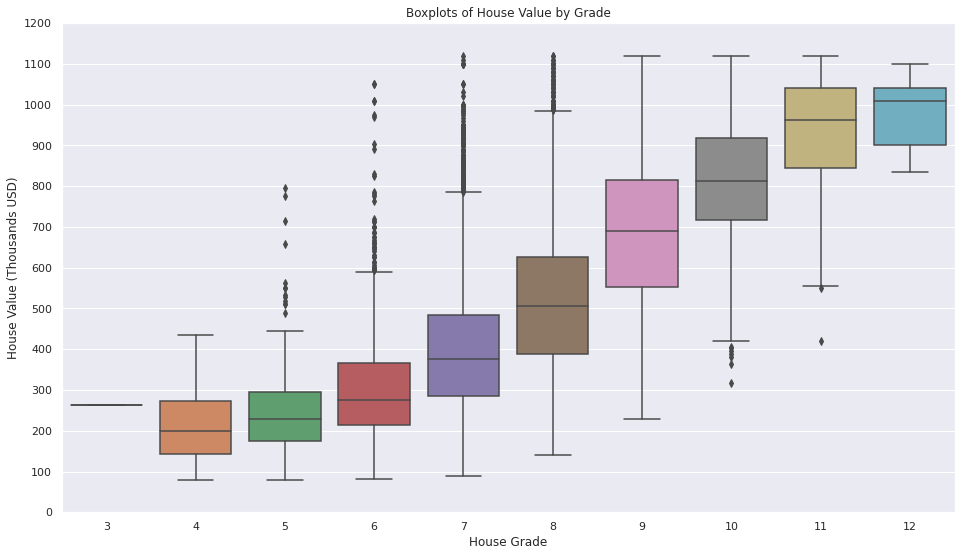

In [36]:
# distplot of the pricing distribution by grade
fig, ax = plt.subplots(figsize=(16, 9))

sns.boxplot('grade', 'price', data=df, ax=ax)

plt.xlabel('House Grade')
plt.ylabel('House Value (Thousands USD)')
plt.title("Boxplots of House Value by Grade")

# configure y axis
ticks = np.arange(0, df['price'].max() + 100000, 100000)
plt.yticks(ticks, [f"{tick/1000:n}" for tick in ticks])

plt.show()

It appears there is some pattern between House Grade and price. It's extremely obvious by the fact that there is an increasing IQR for each House Grade. We can even see with an anova test, that these populations are completely differently priced.

$\alpha = $ 5%

$H_0: \mu_0 = \mu_1 = \mu_2 = \mu_3 ... = \mu_n$

$H_a: \mu_0 \ne \mu_1 \ne \mu_2 \ne \mu_3 ... \ne \mu_n$

In [37]:
# Separate our samples by grade into a list
samples = []
for grade in df['grade'].unique():
    mask = df['grade'] == grade
    samples.append(df.loc[mask, 'price'])

In [38]:
# perform an anova test and output results
results = stats.f_oneway(*samples)
print(f"T-Stat: {results.statistic:.3f}", f"P-Value: {results.pvalue:.8%}", sep='\n')

T-Stat: 1549.881
P-Value: 0.00000000%


We can see here that we can reject the null hypothesis that the samples are derived from the same population, our test statistic is so large that our p-value is close to 0. For our stakeholders we will make this simple by
creating a bar plot of the average house value for each house grade.

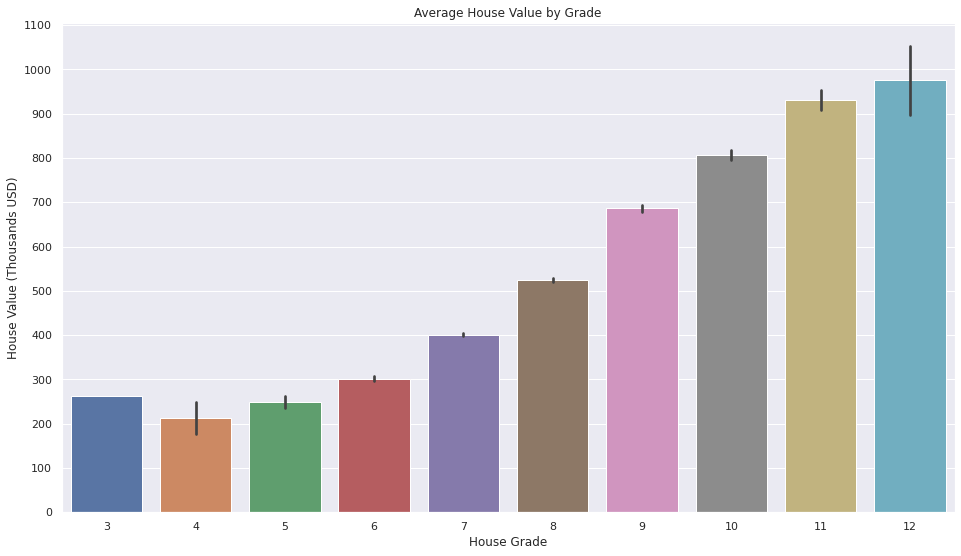

In [39]:
# plot bar plot of average house value by grade
fig, ax = plt.subplots(figsize=(16, 9))

sns.barplot('grade', 'price', data=df, ax=ax)
plt.xlabel('House Grade')
plt.ylabel('House Value (Thousands USD)')
plt.title("Average House Value by Grade")

# configure y axis
ticks = np.arange(0, df['price'].max(), 100000)
plt.yticks(ticks, [f"{tick/1000:n}" for tick in ticks])

plt.show()

# Modeling

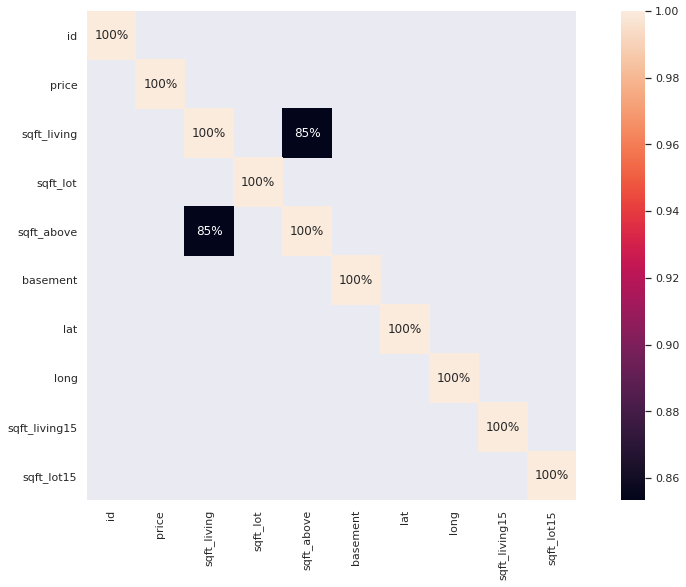

In [40]:
# check for any highly correlated variables
fig, ax = plt.subplots(figsize=(16, 9))

mask = np.abs(df.corr()) > .75

sns.heatmap(np.abs(df.corr()), annot=True, fmt=".0%", square=True, ax=ax, mask=~mask)
plt.show()

We will not use sqft_above in our model, as it has a very high correlation with sqft_lot.

## Feature Engineering

> **Only independent/predictor variable(s) is log-transformed**. Divide the coefficient by 100. This tells us that a 1% increase in the independent variable increases (or decreases) the dependent variable by (coefficient/100) units. Example: the coefficient is 0.198. 0.198/100 = 0.00198. For every 1% increase in the independent variable, our dependent variable increases by about 0.002. For x percent increase, multiply the coefficient by log(1.x). Example: For every 10% increase in the independent variable, our dependent variable increases by about 0.198 * log(1.10) = 0.02.  
> \- https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/

In [41]:
# make two separate lists of our continuous and our categorical features
continuous = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']
categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 
               'grade', 'yr_built', 'renovated', 'zipcode', 'basement']

In [42]:
# display 5 point summary of price
price_sum = df['price'].describe()
display(price_sum.map(lambda val: f"{val:.2f}"))

count      20439.00
mean      476702.63
std       207790.28
min        78000.00
25%       315000.00
50%       437500.00
75%       600000.00
max      1120000.00
Name: price, dtype: object

In [43]:
# log transform and scale our continuous variables
def normalize(feature):
    return (feature - feature.mean())/feature.std()

cont_log = np.log(df[continuous])
cont_log.columns = [f"{col}_log" for col in cont_log.columns]
cont_log = cont_log.apply(normalize)

# get dummies for categorical columns
cat_cols = pd.get_dummies(df[categorical], drop_first=True)

# combine our preprocessed data
preprocessed = pd.concat([cont_log, cat_cols], axis=1)
X = preprocessed
y = df['price']


## Features Selection

In [44]:
# import statsmodels and sklearn
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.feature_selection import RFE

### Simple Linear Regression

To start our regression we will build a simple linear regression model, which only relies on one feature. To help us decide, we will use a few jointplots.

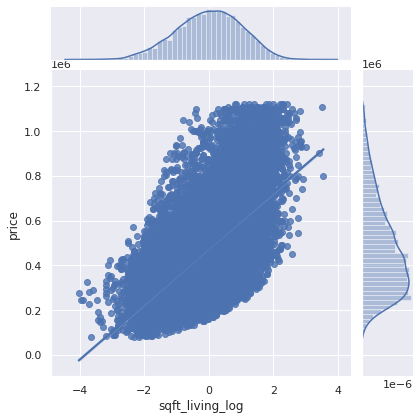

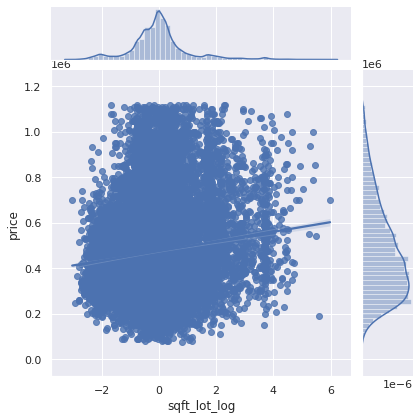

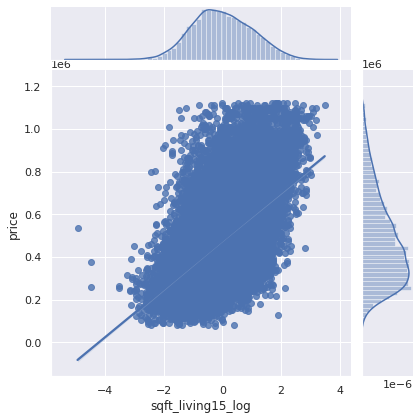

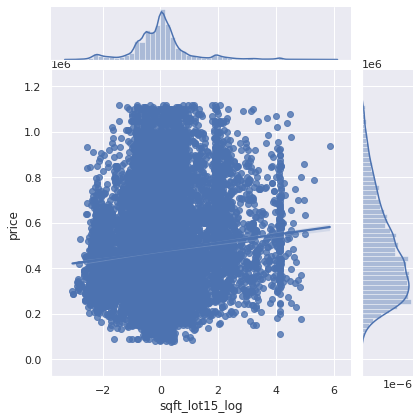

In [45]:
# plot jointplot for continuous variables
for col in cont_log.columns:
    sns.jointplot(col, 'price', data=pd.concat([X, y], axis=1), kind='reg')
    
plt.show()

In [46]:
# split our data
X_train, X_test, y_train, y_test = train_test_split(X[['sqft_living_log']], y, random_state=60)

In [47]:
# create simple linear model using sqft_living and display summary
simple_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
display(simple_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     8662.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:29:10   Log-Likelihood:            -2.0604e+05
No. Observations:               15329   AIC:                         4.121e+05
Df Residuals:                   15327   BIC:                         4.121e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.764e+05   1344.554    354.344      0.000    4.74e+05    4.79e+05
sqft_living_log  1.251e+05   1343.663     93.070      0.000    1.22e+05    1.28e+05
==============================================================================
Omnibus:                      574.266   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.515
Skew:                           0.500   Prob(JB):                    8.20e-140
Kurtosis:                       2.946   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# create our model
linreg = LinearRegression()
linreg = linreg.fit(X_train, y_train)

# compute RMSE for our model
mse_train = mean_squared_error(y_train, linreg.predict(X_train))
mse_test = mean_squared_error(y_test, linreg.predict(X_test))

rmse_train, rmse_test = np.sqrt([mse_train, mse_test])
print("RMSE Train:", (rmse_train), "\nRMSE Test:", (rmse_test))

RMSE Train: 166456.19328179598 
RMSE Test: 165934.2747331028


We don't see any major difference between our RMSE scores for our simple model, and our Adj. R-squared is .361.
This model appears to not do the best, so next we will inspect modeling with more features.

<ipython-input-49-a54be5c66f5c>:3: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



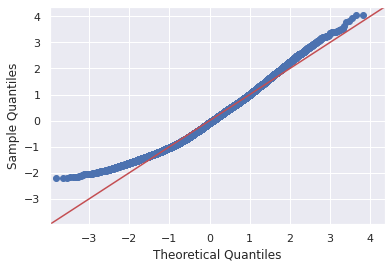

In [49]:
# verify residuals are normally distributed
fig = sm.graphics.qqplot(simple_model.resid, fit=True, line='45')
fig.show()

/home/skelletor/.pyenv/versions/anaconda3-2020.02/envs/housing-market/lib/python3.8/site-packages/statsmodels/graphics/regressionplots.py:266: UserWarning:

tight_layout: falling back to Agg renderer



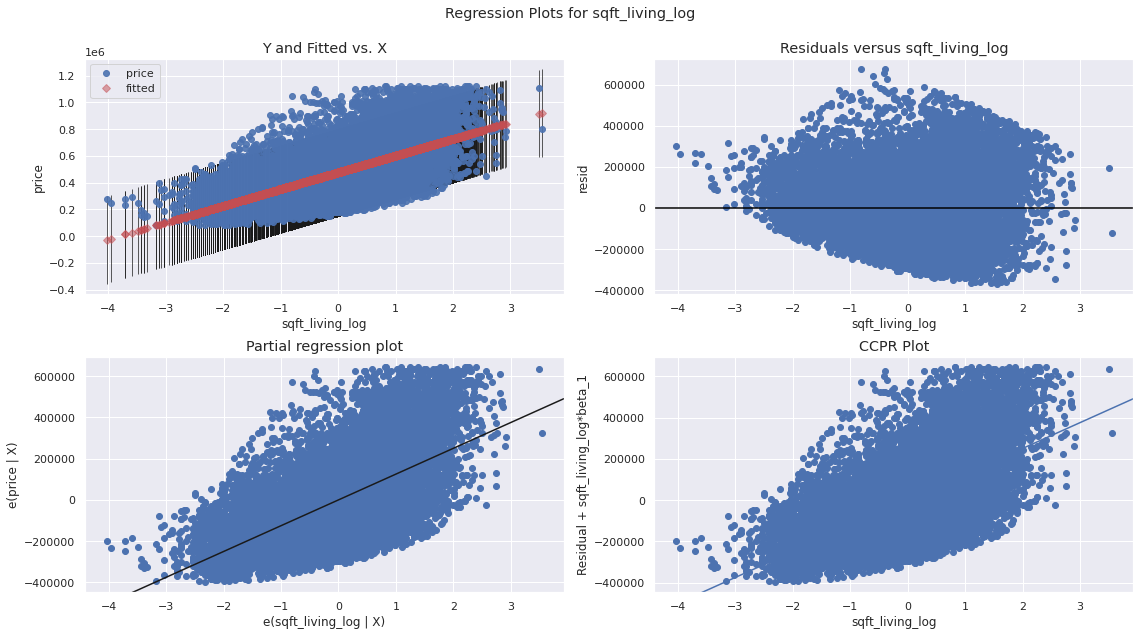

In [50]:
fig = plt.Figure(figsize=(16, 9))
sm.graphics.plot_regress_exog(simple_model, 'sqft_living_log', fig=fig)

Important to note, that it appears the residuals of the model are normally distributed. And that there is may be some heteroskedacity. 

## Recursive Feature Selection

In [51]:
# create model using 10 features
regression = LinearRegression()
selector = RFE(regression, n_features_to_select=10)
selector = selector.fit(X, y)

In [52]:
# output selected columns
selected_features = X.columns[selector.support_]
print(selected_features)

Index(['bathrooms_6.0', 'view_4.0', 'grade_11', 'grade_12', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98039', 'zipcode_98040', 'zipcode_98102',
       'zipcode_98112'],
      dtype='object')


In [53]:
len(selected_features)

10

In [54]:
# Using 5 kfolds we will cross validate and find the RMSE and R-squared
linreg = LinearRegression()

r2 = cross_validate(linreg, X[selected_features], y, scoring='r2', return_train_score=True)
rmse = cross_validate(linreg, X[selected_features], y, scoring='neg_root_mean_squared_error', return_train_score=True)

print(f"Train Score: r2 = {(r2['train_score'].mean())}, rmse = {(-rmse['train_score'].mean())}")
print(f"Test Score: r2 = {(r2['test_score'].mean())}, rmse = {(-rmse['test_score'].mean())}")

Train Score: r2 = 0.12919813827840096, rmse = 193881.89236138557
Test Score: r2 = 0.12427454357164276, rmse = 194158.31656928986


With the selected 10 features, Our R-squared value shows that this model accounts for only 12% of the variation less than the previous 36% in our simple linear model, and our RMSE shows an increase compared to our previous model, $194,158

Meaning our previous model did a better job of modeling.

### RFE Model 2

In [55]:
# create model using 50 features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=109180234)

regression = LinearRegression()
selector = RFE(regression, n_features_to_select=50)
selector = selector.fit(X_train, y_train)

In [56]:
# output selected columns
selected_features = X.columns[selector.support_]
print(selected_features)

Index(['sqft_living_log', 'bedrooms_8', 'bathrooms_1.25', 'bathrooms_6.0',
       'bathrooms_6.75', 'waterfront_1.0', 'view_4.0', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_11', 'grade_12', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98029', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98039', 'zipcode_98040', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98107', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98177', 'zipcode_98199'],
      dtype='object')


In [57]:
# use ols to output summary
mod = sm.OLS(y_train, sm.add_constant(X_train[selected_features])).fit()
display(mod.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1033.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:29:45   Log-Likelihood:            -1.9811e+05
No. Observations:               15329   AIC:                         3.963e+05
Df Residuals:                   15278   BIC:                         3.967e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             4.69e+05   2736.759    171.357      0.000    4.64e+05    4.74e+05
sqft_living_log  9.212e+04   1138.015     80.947      0.000    8.99e+04    9.43e+04
bedrooms_8      -9.811e+04   3.77e+04     -2.602      0.009   -1.72e+05   -2.42e+04
bathrooms_1.25  -1.228e+05   4.07e+04     -3.014      0.003   -2.03e+05   -4.29e+04
bathrooms_6.0   -4.995e+05   1.15e+05     -4.330      0.000   -7.26e+05   -2.73e+05
bathrooms_6.75  -1.719e+05   9.99e+04     -1.721      0.085   -3.68e+05    2.39e+04
waterfront_1.0   1.925e+05   1.87e+04     10.283      0.000    1.56e+05    2.29e+05
view_4.0         1.679e+05   1.11e+04     15.127      0.000    1.46e+05     1.9e+05
grade_5         -1.088e+05   8420.034    -12.917      0.000   -1.25e+05   -9.23e+04
grade_6         -1.323e+05   4293.678    -30.803      0.000   -1.41e+05   -1.24e+05
grade_7         -1.437e+05   2967.249    -48.424      0.000    -1.5e+05   -1.38e+05
grade_8         -1.077e+05   2715.642    -39.653      0.000   -1.13e+05   -1.02e+05
grade_11         1.759e+05   1.03e+04     17.121      0.000    1.56e+05    1.96e+05
grade_12         2.159e+05   5.75e+04      3.754      0.000    1.03e+05    3.29e+05
zipcode_98004     4.72e+05   9228.737     51.143      0.000    4.54e+05     4.9e+05
zipcode_98005    2.805e+05   9420.257     29.771      0.000    2.62e+05    2.99e+05
zipcode_98006    2.312e+05   5872.013     39.365      0.000     2.2e+05    2.43e+05
zipcode_98007    2.062e+05   9789.553     21.065      0.000    1.87e+05    2.25e+05
zipcode_98008    1.912e+05   7083.334     26.986      0.000    1.77e+05    2.05e+05
zipcode_98024    1.113e+05   1.31e+04      8.489      0.000    8.56e+04    1.37e+05
zipcode_98027    1.378e+05   5914.300     23.302      0.000    1.26e+05    1.49e+05
zipcode_98029    1.603e+05   6637.263     24.150      0.000    1.47e+05    1.73e+05
zipcode_98033    2.689e+05   6160.792     43.647      0.000    2.57e+05    2.81e+05
zipcode_98034    1.269e+05   5073.344     25.017      0.000    1.17e+05    1.37e+05
zipcode_98039     5.96e+05   4.45e+04     13.408      0.000    5.09e+05    6.83e+05
zipcode_98040    3.836e+05   9045.483     42.410      0.000    3.66e+05    4.01e+05
zipcode_98052    1.961e+05   4991.194     39.299      0.000    1.86e+05    2.06e+05
zipcode_98053     1.88e+05   5960.928     31.531      0.000    1.76e+05       2e+05
zipcode_98072    1.227e+05   7237.315     16.954      0.000    1.09e+05    1.37e+05
zipcode_98074     1.56e+05   5848.153     26.667      0.000    1.44e+05    1.67e+05
zipcode_98075    1.956e+05   6640.566     29.451      0.000    1.83e+05    2.09e+05
zipcode_98077    1.324e+05   8822.119     15.004      0.000    1.15e+05     1.5e+05
zipcode_98102    3.523e+05   1.23e+04     28.585      0.000    3.28e+05    3.76e+05
zipcode_98103    2.628e+05   4902.364     53.607      0.000

In [58]:
# output our RMSE
print(f"Adjusted R-squared: {mod.rsquared_adj: .1%}")

linreg = LinearRegression()
linreg = linreg.fit(X_train, y_train)

rmse_train = mean_squared_error(y_train, linreg.predict(X_train))
rmse_test = mean_squared_error(y_test, linreg.predict(X_test))

print(f"RMSE Train: {np.sqrt(rmse_train):.2f}")
print(f"RMSE Test: {np.sqrt(rmse_test):.2f}")



Adjusted R-squared:  77.1%
RMSE Train: 82625.76
RMSE Test: 23634345356776284.00


Huge difference between our training set's RMSE and our Test sets RMSE.

Adjusted R-squared:  77.1%  
RMSE Train: 82625.76  
RMSE Test: 23634345356776284.00

## Step Wise Selection

In [59]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            mask = pvalues == worst_pval
            worst_feature = np.array(included)[mask][0]
            try:
                included.remove(worst_feature)
            except:
                pass
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [60]:
# split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2309814)

In [61]:
import pickle

with open('stepwise-features.pickle', 'rb') as f:
    selected_features = pickle.load(f)

In [62]:
# # perform our function over our entire preprocessed dataset
# selected_features = stepwise_selection(X_train, y_train) # very expensive operation

# with open('stepwise-features.pickle', 'wb') as f:
#     pickle.dump(selected_features, f)

In [63]:
# create our model
model = sm.OLS(y_train, sm.add_constant(X_train[selected_features])).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     661.2
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:29:45   Log-Likelihood:            -1.9539e+05
No. Observations:               15329   AIC:                         3.910e+05
Df Residuals:                   15208   BIC:                         3.920e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.915e+05   1.85e+04     10.339      0.000    1.55e+05    2.28e+05
grade_10           1.791e+05   4506.685     39.737      0.000     1.7e+05    1.88e+05
grade_9            1.199e+05   2950.839     40.643      0.000    1.14e+05    1.26e+05
grade_8            4.092e+04   1894.776     21.594      0.000    3.72e+04    4.46e+04
sqft_living_log    6.877e+04   1284.899     53.522      0.000    6.63e+04    7.13e+04
zipcode_98023     -4.802e+04   4875.537     -9.850      0.000   -5.76e+04   -3.85e+04
zipcode_98004      4.904e+05   8381.655     58.508      0.000    4.74e+05    5.07e+05
grade_11           2.765e+05   9216.862     29.995      0.000    2.58e+05    2.95e+05
zipcode_98042     -2.277e+04   4560.837     -4.992      0.000   -3.17e+04   -1.38e+04
zipcode_98092     -5.182e+04   5495.868     -9.428      0.000   -6.26e+04    -4.1e+04
zipcode_98115      3.031e+05   4726.303     64.135      0.000    2.94e+05    3.12e+05
zipcode_98103       3.16e+05   4831.157     65.415      0.000    3.07e+05    3.25e+05
zipcode_98040      3.917e+05   7693.598     50.907      0.000    3.77e+05    4.07e+05
zipcode_98117      2.979e+05   4841.690     61.534      0.000    2.88e+05    3.07e+05
zipcode_98112      4.128e+05   7856.015     52.540      0.000    3.97e+05    4.28e+05
zipcode_98199      3.444e+05   6251.422     55.098      0.000    3.32e+05    3.57e+05
zipcode_98033      2.924e+05   5401.928     54.130      0.000    2.82e+05    3.03e+05
zipcode_98119      3.858e+05   8412.634     45.858      0.000    3.69e+05    4.02e+05
zipcode_98105      3.601e+05   7984.051     45.098      0.000    3.44e+05    3.76e+05
sqft_living15_log   1.76e+04   1159.288     15.185      0.000    1.53e+04    1.99e+04
zipcode_98107      3.143e+05   6577.876     47.784      0.000    3.01e+05    3.27e+05
zipcode_98116      2.767e+05   6056.852     45.686      0.000    2.65e+05    2.89e+05
zipcode_98122      3.049e+05   6464.742     47.164      0.000    2.92e+05    3.18e+05
zipcode_98003     -3.322e+04   6127.956     -5.421      0.000   -4.52e+04   -2.12e+04
zipcode_98030     -3.018e+04   6548.212     -4.609      0.000    -4.3e+04   -1.73e+04
zipcode_98031     -2.109e+04   6272.521     -3.363      0.001   -3.34e+04   -8796.604
condition_3        9.398e+04   1.84e+04      5.107      0.000    5.79e+04     1.3e+05
zipcode_98102      4.131e+05   1.05e+04     39.222      0.000    3.92e+05    4.34e+05
zipcode_98109      3.873e+05   1.08e+04     35.723      0.000    3.66e+05    4.09e+05
view_4.0           1.582e+05   9048.113     17.487      0.000     1.4e+05    1.76e+05
zipcode_98002     -2.329e+04   7075.128     -3.292      0.001   -3.72e+04   -9426.090
zipcode_98006       2.44e+05   5333.452     45.751      0.000    2.34e+05    2.54e+05
zipcode_98005      3.055e+05   8240.648     37.073      0.000    2.89e+05

In [64]:
# Using 10 kfolds we will cross validate and find the RMSE and R-squared
linreg = LinearRegression()

r2 = cross_validate(linreg, X[selected_features], y, scoring='r2', return_train_score=True, cv=10)
rmse = cross_validate(linreg, X[selected_features], y, scoring='neg_root_mean_squared_error', return_train_score=True, cv=10)

print(f"Train Score: r2 = {(r2['train_score'].mean())}, rmse = {(-rmse['train_score'].mean())}")
print(f"Test Score: r2 = {(r2['test_score'].mean())}, rmse = {(-rmse['test_score'].mean())}")

Train Score: r2 = 0.8384051247878699, rmse = 83524.33573696847
Test Score: r2 = 0.8334823016298601, rmse = 84537.18740113176


With this model we can see that our R-squared value is much greater than our previous models. 83% of the variation is explained by our model. Our RMSE has also decreased significantly to  $84,537

In [65]:
# Let's find out the coefficients for our continuous variables
display((model.params.sort_values(ascending=False)/100).loc[[f"{val}_log" for val in continuous]])

sqft_living_log      687.705622
sqft_lot_log         319.398610
sqft_living15_log    176.041855
sqft_lot15_log       -99.938714
dtype: float64

For every 1% increase in sqft_living, we see an increase in house value by \$687.

Meaning, a house with a sqft_living of 1,000, will be worth (206100) + (191516.78) = \$397616.77, with everything else held constant. 

In [66]:
# top 3 unique independent variables
model.params.sort_values(ascending=False).head(41)

zipcode_98039     606524.704859
zipcode_98004     490397.902074
zipcode_98102     413117.561589
zipcode_98112     412758.874971
zipcode_98040     391656.812010
zipcode_98109     387298.869687
zipcode_98119     385783.581972
zipcode_98105     360061.698225
zipcode_98199     344439.062685
grade_12          322168.213367
zipcode_98103     316028.447615
zipcode_98107     314314.358291
zipcode_98005     305508.138266
zipcode_98122     304901.988282
zipcode_98115     303119.893168
zipcode_98117     297927.761153
zipcode_98033     292405.960053
zipcode_98116     276713.059624
grade_11          276460.140688
zipcode_98006     244012.776893
zipcode_98136     236864.249290
zipcode_98007     235202.010308
zipcode_98144     233909.147788
zipcode_98052     226841.301813
zipcode_98008     216553.796847
zipcode_98053     211291.417411
zipcode_98075     204433.113196
zipcode_98029     198308.190827
zipcode_98177     194037.138133
const             191516.777436
zipcode_98074     181586.743326
grade_10

Being in the zipcode 98039, adds $606,524.70 to house value.

Having a house grade of 12, adds $322,168.21 to house value.

Having a house that's near the waterfront, adds $140,481.69 to house value